In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn import preprocessing
import networkx as nx
import string
import scipy.stats as sc

In [2]:
#import data
data = pd.read_csv("cleanData.csv",index_col = 0)
data.head()

,Name,State,Party,Bill_1,Bill_2,Bill_3,Bill_4,Bill_5,Bill_6,Bill_7,...,Bill_301,Bill_302,Bill_303,Bill_304,Bill_305,Bill_306,Bill_307,Bill_308,Bill_309,Bill_310
0,a_dutch_ruppersberger,Maryland,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
1,abigail_spanberger,Virginia,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
2,adam_kinzinger,Illinois,Republican,Yea,Nay,Nay,Nay,Yea,Nay,Yea,...,Yea,Yea,Nay,Nay,Yea,Yea,Yea,Yea,Yea,Yea
3,adam_schiff,California,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea
4,adam_smith,Washington,Democrat,Yea,Yea,Yea,Yea,Nay,Yea,Yea,...,Yea,Yea,Yea,Yea,Yea,Yea,Nay,Yea,Yea,Yea


In [3]:
names = data["Name"]
party =  data["Party"]

In [4]:
repNames = names[party=="Republican"]
demNames = names[party=="Democrat"]

In [5]:
#label encoder
le = preprocessing.LabelEncoder()
le.fit(data["Bill_10"])
for i in range(1,311):
    data["Bill_"+str(i)] = le.transform(data["Bill_"+str(i)])
print(le.classes_)
data.head()


['Nay' 'Yea']


,Name,State,Party,Bill_1,Bill_2,Bill_3,Bill_4,Bill_5,Bill_6,Bill_7,...,Bill_301,Bill_302,Bill_303,Bill_304,Bill_305,Bill_306,Bill_307,Bill_308,Bill_309,Bill_310
0,a_dutch_ruppersberger,Maryland,Democrat,1,1,1,1,0,1,1,...,1,1,1,1,1,1,0,1,1,1
1,abigail_spanberger,Virginia,Democrat,1,1,1,1,0,1,1,...,1,1,1,1,1,1,0,1,1,1
2,adam_kinzinger,Illinois,Republican,1,0,0,0,1,0,1,...,1,1,0,0,1,1,1,1,1,1
3,adam_schiff,California,Democrat,1,1,1,1,0,1,1,...,1,1,1,1,1,1,0,1,1,1
4,adam_smith,Washington,Democrat,1,1,1,1,0,1,1,...,1,1,1,1,1,1,0,1,1,1


In [6]:

data = data.drop(["State","Party"], axis =1)
data.head()

,Name,Bill_1,Bill_2,Bill_3,Bill_4,Bill_5,Bill_6,Bill_7,Bill_8,Bill_9,...,Bill_301,Bill_302,Bill_303,Bill_304,Bill_305,Bill_306,Bill_307,Bill_308,Bill_309,Bill_310
0,a_dutch_ruppersberger,1,1,1,1,0,1,1,0,0,...,1,1,1,1,1,1,0,1,1,1
1,abigail_spanberger,1,1,1,1,0,1,1,0,0,...,1,1,1,1,1,1,0,1,1,1
2,adam_kinzinger,1,0,0,0,1,0,1,0,0,...,1,1,0,0,1,1,1,1,1,1
3,adam_schiff,1,1,1,1,0,1,1,0,0,...,1,1,1,1,1,1,0,1,1,1
4,adam_smith,1,1,1,1,0,1,1,0,0,...,1,1,1,1,1,1,0,1,1,1


In [7]:
data = data.T
data.head()

,0,1,2,3,4,5,6,7,8,9,...,428,429,430,431,432,433,434,435,436,437
Name,a_dutch_ruppersberger,abigail_spanberger,adam_kinzinger,adam_schiff,adam_smith,adrian_smith,adriano_espaillat,al_green,al_lawson,alan_lowenthal,...,vicky_hartzler,victoria_spartz,virginia_foxx,warren_davidson,william_keating,william_timmons,young_kim,yvette_clarke,yvette_herrell,zoe_lofgren
Bill_1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Bill_2,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1
Bill_3,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1
Bill_4,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1


In [8]:
data.columns = data.iloc[0]
data = data.drop("Name")
data.head()

Name,a_dutch_ruppersberger,abigail_spanberger,adam_kinzinger,adam_schiff,adam_smith,adrian_smith,adriano_espaillat,al_green,al_lawson,alan_lowenthal,...,vicky_hartzler,victoria_spartz,virginia_foxx,warren_davidson,william_keating,william_timmons,young_kim,yvette_clarke,yvette_herrell,zoe_lofgren
Bill_1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Bill_2,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1
Bill_3,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1
Bill_4,1,1,0,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,1,0,1
Bill_5,0,0,1,0,0,1,0,0,0,0,...,1,1,1,1,0,1,1,0,1,0


In [9]:
def distanceMatrix(names,data):
    distances = []
    for i in names:
        person = data[i]
        distance = []
        for j in data.columns:
            distance.append(310 - (np.sum(person == data[j])))
            
        distances.append(distance)
    return distances
    

In [10]:
distMat = distanceMatrix(names,data)


In [35]:
distMat[2]

[186,
 177,
 0,
 192,
 191,
 41,
 195,
 191,
 189,
 193,
 183,
 190,
 48,
 198,
 187,
 187,
 190,
 69,
 29,
 100,
 77,
 184,
 193,
 179,
 187,
 185,
 32,
 189,
 186,
 20,
 181,
 30,
 48,
 42,
 198,
 193,
 57,
 54,
 61,
 186,
 39,
 186,
 191,
 44,
 37,
 188,
 64,
 41,
 38,
 34,
 43,
 193,
 192,
 188,
 37,
 183,
 191,
 190,
 34,
 58,
 58,
 189,
 62,
 45,
 40,
 63,
 27,
 42,
 179,
 192,
 33,
 189,
 41,
 182,
 189,
 179,
 96,
 31,
 177,
 44,
 183,
 41,
 40,
 39,
 64,
 33,
 182,
 181,
 203,
 180,
 66,
 34,
 27,
 191,
 35,
 46,
 192,
 39,
 36,
 185,
 41,
 187,
 22,
 40,
 34,
 189,
 52,
 45,
 185,
 183,
 26,
 184,
 189,
 48,
 185,
 184,
 190,
 187,
 41,
 188,
 53,
 189,
 33,
 31,
 190,
 186,
 185,
 193,
 189,
 52,
 49,
 39,
 33,
 192,
 192,
 46,
 179,
 185,
 190,
 182,
 36,
 179,
 188,
 46,
 187,
 20,
 183,
 33,
 185,
 192,
 38,
 31,
 193,
 32,
 34,
 34,
 55,
 184,
 187,
 53,
 35,
 194,
 190,
 50,
 185,
 188,
 39,
 67,
 38,
 38,
 192,
 191,
 181,
 36,
 177,
 190,
 201,
 42,
 189,
 38,
 41,
 1

In [34]:
party

0        Democrat
1        Democrat
2      Republican
3        Democrat
4        Democrat
          ...    
433    Republican
434    Republican
435      Democrat
436    Republican
437      Democrat
Name: Party, Length: 438, dtype: object

In [11]:
color = []
for i in party:
    if i == "Democrat":
        color.append("blue")
    elif i == "Republican":
        color.append("red")
    

In [42]:
#n = 10
n = len(distMat)
mini = distMat[0:n]
for i in range(0,n):
    mini[i] = mini[i][0:n]
   

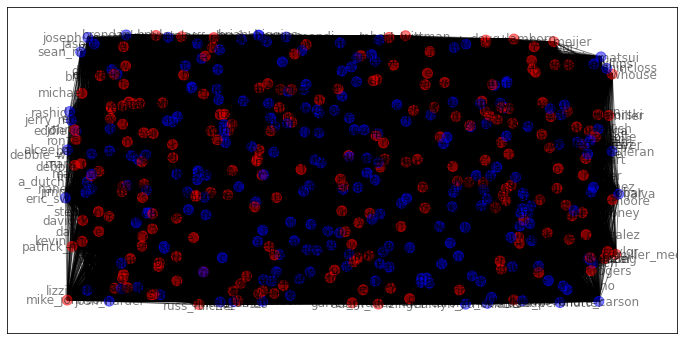

In [43]:
dt = [('len', float)]
A = np.array(mini)
A = A.view(dt)

G = nx.from_numpy_matrix(A)
G = nx.relabel_nodes(G, dict(zip(range(len(G.nodes())),names[0:n])))    

plt.figure(figsize = (12,6))
pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='neato')

G = nx.drawing.nx_pylab.draw_networkx(G,pos=pos,node_size = 100, node_color = color[0:n],alpha = .5)
#G = nx.drawing.nx_agraph.to_agraph(G)



In [14]:
dt = [('len', float)]
A = np.array(mini)
A = A.view(dt)

G = nx.from_numpy_matrix(A)
G = nx.relabel_nodes(G, dict(zip(range(len(G.nodes())),string.ascii_uppercase)))    

G = nx.drawing.nx_agraph.to_agraph(G)

G.node_attr.update(color="red")
G.edge_attr.update(color="black")


G.draw('graph.png', format='png', prog= 'neato')

# Clustering Algortihm

In [18]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(distMat)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,

In [25]:
y_pred = cluster.labels_


In [23]:
np.random.seed(1)
le = preprocessing.LabelEncoder()
le.fit(party)
y = le.transform(party)
y

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,

In [30]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


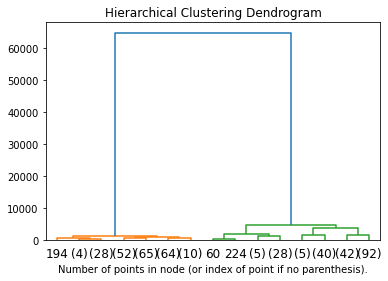

In [31]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(distMat)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()